In [1]:
import sys
from matplotlib import pyplot as plt
import numpy as np
import quicc_bind

# 1) Opening files and loading data

In [2]:
from QuICCPython import read
#filename= '/home/nicolol/LocalRuns/CouetteImplicit/state0000.hdf5'
filename_spectral = 'stateSpectralShellQuICC.hdf5'
filename_physical = 'statePhysicalShellQuICC.hdf5'
mySpectralData = read.SpectralState(filename_spectral, 'shell')
myPhysicalData = read.PhysicalState(filename_physical, 'shell')

print('The spectral resolution is ({},{},{})'
      .format(mySpectralData.specRes.N,mySpectralData.specRes.L, mySpectralData.specRes.M))
print('The lengths of the various grids are  ({},{},{})'.
      format(len(myPhysicalData.grid_r),len(myPhysicalData.grid_theta), len(myPhysicalData.grid_phi)))

The spectral resolution is (24,48,24)
The lengths of the various grids are  (48,74,73)


# 2) spectral data to meridional slice

In [3]:
from QuICCPython.shell.spectral import getMeridionalSlice
spectralFieldMeridional = getMeridionalSlice(mySpectralData, field = 'velocity')
# here the available fields are 'velocity', 'vorticity', 'magnetic', 'current'.
# Field 'temp' and other scalar field are currently not implemented for shell geometries

In [4]:
spectralFieldMeridional['u']

dict_keys(['x', 'y', 'uR', 'uTheta', 'uPhi'])

(0.017866234944737137,
 1.5378328322297645,
 -1.5373477247679628,
 1.5373477247679628)

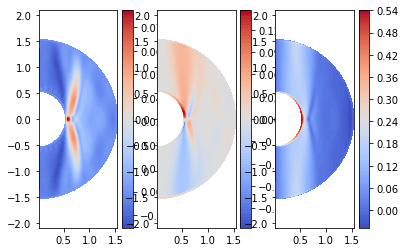

In [4]:
# Plot the meridional slices from getMeridionalSlice
from matplotlib import pyplot as plt
%matplotlib inline
X = spectralFieldMeridional['x']
Y = spectralFieldMeridional['y']
Ur, Utheta, Uphi = spectralFieldMeridional['uR'], spectralFieldMeridional['uTheta'], spectralFieldMeridional['uPhi']
plt.figure(1)

plt.subplot(131)
f1 = plt.contourf(X, Y, Ur, 100, cmap='coolwarm')
plt.colorbar(f1)
plt.axis('equal')

plt.subplot(132)
f2 = plt.contourf(X, Y, Utheta , 100, cmap='coolwarm')
plt.colorbar(f2)
plt.axis('equal')

plt.subplot(133)
f3 = plt.contourf(X, Y, Uphi , 100, cmap='coolwarm')
plt.colorbar(f3)
plt.axis('equal')

In [33]:
from QuICCPython.shell.spectral import getMeridionalSlice
spectralVortFieldMeridional = getMeridionalSlice(mySpectralData, field = 'vorticity')
# here the available fields are 'velocity', 'vorticity', 'magnetic', 'current'.
# Field 'temp' and other scalar field are currently not implemented for shell geometries

(0.017866234944737137,
 1.5378328322297645,
 -1.5373477247679628,
 1.5373477247679628)

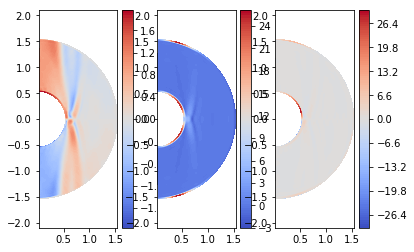

In [35]:
# Plot the meridional slices from getMeridionalSlice for Vorticity
from matplotlib import pyplot as plt
%matplotlib inline
X = spectralVortFieldMeridional['x']
Y = spectralVortFieldMeridional['y']
Ur, Utheta, Uphi = spectralVortFieldMeridional['vortR'], spectralVortFieldMeridional['vortTheta'], spectralVortFieldMeridional['vortPhi']

plt.subplot(131)
f1 = plt.contourf(X, Y, Ur, 100, cmap='coolwarm')
plt.colorbar(f1)
plt.axis('equal')

plt.subplot(132)
f2 = plt.contourf(X, Y, Utheta , 100, cmap='coolwarm')
plt.colorbar(f2)
plt.axis('equal')

plt.subplot(133)
f3 = plt.contourf(X, Y, Uphi , 100, cmap='coolwarm')
plt.colorbar(f3)
plt.axis('equal')

# 3) physical data to meridional slice

In [36]:
from QuICCPython.shell.physical import getMeridionalSlice
physicalFieldMeridional = getMeridionalSlice(myPhysicalData, field = 'velocity')
# here the available fields are 'velocity', 'vorticity', 'magnetic', 'current'.
# Field 'temp' and other scalar field are currently not implemented for shell geometries

(0.0, 1.5378328322297645, -1.5381938321997213, 1.5381938321997213)

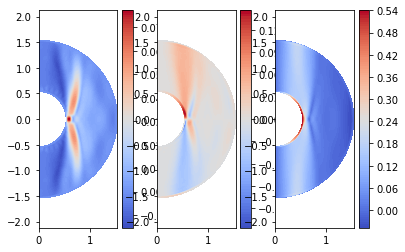

In [37]:
# Plot the meridional slices from getMeridionalSlice
%matplotlib inline
X, Y = physicalFieldMeridional['x'], physicalFieldMeridional['y']
Ur, Utheta, Uphi = physicalFieldMeridional['uR'], physicalFieldMeridional['uTheta'], physicalFieldMeridional['uPhi']
plt.figure(2)
plt.subplot(131)
f1 = plt.contourf(X, Y, Ur, 100, cmap='coolwarm')
plt.colorbar(f1)
plt.axis('equal')

plt.subplot(132)
f2 = plt.contourf(X, Y, Utheta, 100, cmap='coolwarm')
plt.colorbar(f2)
plt.axis('equal')

plt.subplot(133)
f3 = plt.contourf(X, Y, Uphi, 100, cmap='coolwarm')
plt.colorbar(f3)
plt.axis('equal')

# 4) spectral data to equatorial slice

In [9]:
from QuICCPython.shell.spectral import getEquatorialSlice
spectralFieldEquatorial = getEquatorialSlice(mySpectralData)

(-1.5381938321997213,
 1.5381938321997213,
 -1.5381938321997213,
 1.5381938321997213)

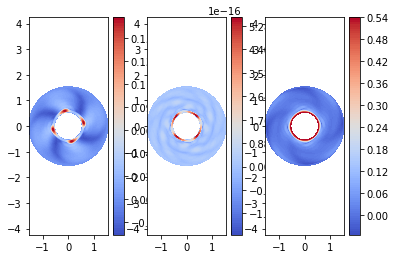

In [38]:
# Plot the equatorial slices from getEquatorialSlice
from matplotlib import pyplot as plt
%matplotlib inline
X, Y = spectralFieldEquatorial['x'], spectralFieldEquatorial['y']
Ur, Utheta, Uphi = spectralFieldEquatorial['uR'], spectralFieldEquatorial['uTheta'], spectralFieldEquatorial['uPhi']

plt.subplot(131)
f1 = plt.contourf(X, Y, Ur, 100, cmap='coolwarm')
plt.colorbar(f1)
plt.axis('equal')

plt.subplot(132)
f2 = plt.contourf(X, Y, Utheta, 100, cmap='coolwarm')
plt.colorbar(f2)
plt.axis('equal')

plt.subplot(133)
f3 = plt.contourf(X, Y, Uphi, 100, cmap='coolwarm')
plt.colorbar(f3)
plt.axis('equal')


# 5) physical data to equatorial slice

In [39]:
from QuICCPython.shell.physical import getEquatorialSlice
physicalFieldEquatorial = getEquatorialSlice(myPhysicalData)

(-1.5381938321997213,
 1.5381938321997213,
 -1.5381938321997213,
 1.5381938321997213)

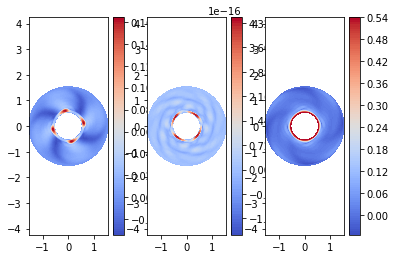

In [40]:
# Plot the equatorial slice from getEquatorialSlice
X, Y = physicalFieldEquatorial['x'],physicalFieldEquatorial['y']
Ur, Uth, Uphi = physicalFieldEquatorial['uR'], physicalFieldEquatorial['uTheta'], physicalFieldEquatorial['uPhi']
plt.figure(5)
plt.subplot(131)
f1 = plt.contourf(X, Y, Ur, 100, cmap='coolwarm')
plt.colorbar(f1)
plt.axis('equal')

plt.subplot(132)
f2 = plt.contourf(X, Y, Uth, 100, cmap='coolwarm')
plt.colorbar(f2)
plt.axis('equal')

plt.subplot(133)
f3 = plt.contourf(X, Y, Uphi, 100, cmap='coolwarm')
plt.colorbar(f3)
plt.axis('equal')

# 6) spectral data to IsoRadius surface

In [13]:
from QuICCPython.shell.spectral import getIsoradiusSlice
spectralFieldIsoradius = getIsoradiusSlice(mySpectralData, field='velocity')

(0.0, 6.283185307179586, 0.033169744741861976, 3.108422908847931)

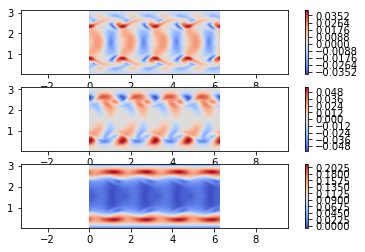

In [41]:
# Plot the isosurface at r=.5 from getIsoradiusSlice
%matplotlib inline
Y, X = spectralFieldIsoradius['theta'], spectralFieldIsoradius['phi']
Ur, Uth, Uphi = spectralFieldIsoradius['uR'], spectralFieldIsoradius['uTheta'], spectralFieldIsoradius['uPhi']
plt.figure(5)
plt.subplot(311)
f1 = plt.contourf(X, Y, Ur, 100, cmap='coolwarm')
plt.colorbar(f1)
plt.axis('equal')

plt.subplot(312)
f2 = plt.contourf(X, Y, Uth, 100, cmap='coolwarm')
plt.colorbar(f2)
plt.axis('equal')

plt.subplot(313)
f3 = plt.contourf(X, Y, Uphi, 100, cmap='coolwarm')
plt.colorbar(f3)
plt.axis('equal')

# 7) physical data to to IsoRadius surface

In [23]:
from QuICCPython.shell.physical import getIsoradiusSlice
physicalFieldIsoradius = getIsoradiusSlice(myPhysicalData, field = 'velocity')

(0.0, 6.283185307179586, 0.0, 3.141592653589793)

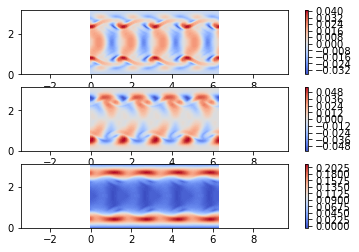

In [42]:
# Plot the isosurface at r=.5 from getIsoradiusSlice
%matplotlib inline
Y, X = physicalFieldIsoradius['theta'], physicalFieldIsoradius['phi']
Ur, Uth, Uphi = physicalFieldIsoradius['uR'], physicalFieldIsoradius['uTheta'], physicalFieldIsoradius['uPhi']
# TODO: change the dictionaries to uR, uTheta, uPhi vortR, vortTheta, vortPhi
plt.figure(5)
plt.subplot(311)
f1 = plt.contourf(X, Y, Ur, 100, cmap='coolwarm')
plt.colorbar(f1)
plt.axis('equal')

plt.subplot(312)
f2 = plt.contourf(X, Y, Uth, 100, cmap='coolwarm')
plt.colorbar(f2)
plt.axis('equal')

plt.subplot(313)
f3 = plt.contourf(X, Y, Uphi, 100, cmap='coolwarm')
plt.colorbar(f3)
plt.axis('equal')

## calculation of lines
We generate a cut in the meridional plane at an angle $\phi_0 = \pi/2$. The cut is at $s$ variable and at $z\equiv const.$. We can then transform the meridional coordinates to 
\begin{align}
r = \left(s^2+z^2\right)^{1/2} \\
\theta = \arctan2\left(s, z\right),
\end{align}
and pass them as an argument to the getPointValue functions from both spectral and physical


In [5]:
N = 100 # define the number of points
eta = .35
mid_radius = 1/2*(1+eta)/(1-eta)
s = np.linspace(0,mid_radius/2**.5, N)
z = np.ones_like(s)*mid_radius
phi = np.ones_like(s)*np.pi/2
r = (s**2 + z**2)**.5
theta = np.arctan2(s,z)

3988.2573073415697

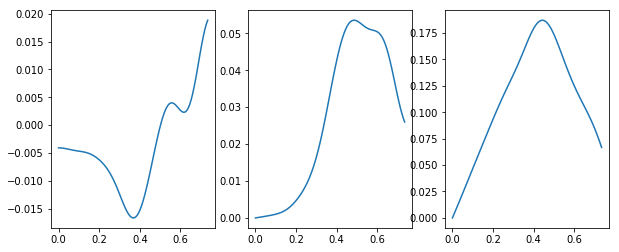

In [14]:
from QuICCPython.shell.spectral import getPointValue
spectralPointValue = getPointValue(mySpectralData, r, theta, phi, field = 'velocity')
uR, uTheta, uPhi = spectralPointValue['uR'], spectralPointValue['uTheta'], spectralPointValue['uPhi']

%matplotlib inline
plt.figure(figsize = (10, 4))
plt.subplot(131)
plt.plot(s, uR)

plt.subplot(132)
plt.plot(s, uTheta)

plt.subplot(133)
plt.plot(s, uPhi)
mySpectralData.parameters.time

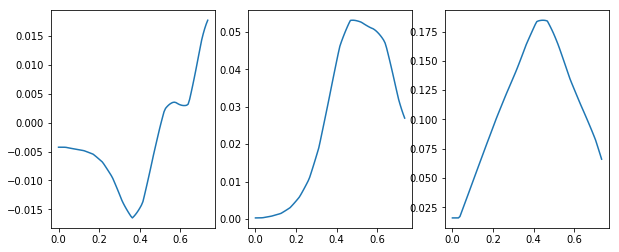

In [9]:
from QuICCPython.shell.physical import getPointValue
physicalPointValue = getPointValue(myPhysicalData, r, theta, phi, field = 'velocity')
uR, uTheta, uPhi = physicalPointValue['uR'], physicalPointValue['uTheta'], physicalPointValue['uPhi']

%matplotlib inline
plt.figure(figsize = (10, 4))
plt.subplot(131)
plt.plot(s, uR)

plt.subplot(132)
plt.plot(s, uTheta)

plt.subplot(133)
plt.plot(s, uPhi)

## Benchmark of the two 'getPointValue' implementations 
$L_2$ relative errors are computed as 
\begin{equation}
L_2\left(u\right) = \frac{\left\lVert u^{spec} - u^{phys}\right\rVert_2}{\left\lVert u^{spec}\right\rVert_2}
\end{equation}

The $L_2$ relative error for $u_r$ is: {{np.linalg.norm(spectralPointValue['uR']-physicalPointValue['uR'] ) / np.linalg.norm(spectralPointValue['uR']) }}

The $L_2$ relative error fro $u_\theta$ is: {{np.linalg.norm(spectralPointValue['uTheta']-physicalPointValue['uTheta'] ) / np.linalg.norm(spectralPointValue['uTheta']) }}

The $L_2$ relative error fro $u_\phi$ is: {{np.linalg.norm(spectralPointValue['uPhi']-physicalPointValue['uPhi'] ) / np.linalg.norm(spectralPointValue['uPhi']) }}

# 8) $\mathbf{\omega}_f$ calculator

In [17]:
from QuICCPython.shell.spectral import computeUniformVorticity
omega_f = computeUniformVorticity(mySpectralData)
omega_f2 = computeUniformVorticity(mySpectralData, rmin = .4, rmax = .6)


With default cutoff of $\delta = 10 * E ^{1/2}$, $\omega_f$ is: {{omega_f[0]}} \\ {{omega_f[1]}} \\ {{omega_f[2]}} 

On a very narrow shell in the middle, $\omega_f$ is: {{omega_f2[0]}} \\ {{omega_f2[1]}} \\ {{omega_f2[2]}} 

# 9) Rotate the state in direction of the flow


In [18]:
from QuICCPython.shell.spectral import alignAlongFluidAxis

# the 3 Eulerian rotations are no longer done inplace

rotatedSpectralState = alignAlongFluidAxis(mySpectralData, omega_f)
mySpectralData.parameters.ekman = 3.

print(rotatedSpectralState.parameters.ekman)
# change name to alignAlongFluidAxis

0.0001


# 10) Compute Geostrophic flow

In [19]:
from QuICCPython.shell.spectral import  computeZIntegral

nNs = 20 # resolution in cylindrical radial coordinates
geoSpecUS = computeZIntegral(mySpectralData, 'uS', nNs, maxL  =80, maxM = 40, maxN = 20)
geoSpecUPhi = computeZIntegral(mySpectralData, 'uPhi', nNs, maxL  =80, maxM = 40, maxN = 40)
geoSpecVortZ = computeZIntegral(mySpectralData, 'vortZ', nNs, maxL  =80, maxM = 40, maxN = 40)
geoSpecUZ = computeZIntegral(mySpectralData, 'uZ', nNs, maxL  =80, maxM = 40, maxN = 40)


(20, 20, 48, 24)
(20, 24, 48, 24)
(20, 24, 48, 24)
(20, 24, 48, 24)


(-15.387495373796552,
 15.387495373796552,
 -15.351623570500722,
 15.351623570500724)

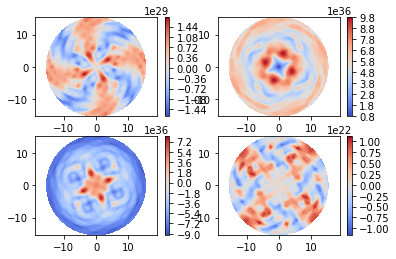

In [43]:
# plot the geostrophic flow components
from QuICCPython.shell.spectral import computeGeostrophicPhysical
# visualization_tools gets merged with spectral

# getGeostrophicPhysical not computeRealFields
geoPhysUS = computeGeostrophicPhysical(geoSpecUS)
geoPhysUPhi = computeGeostrophicPhysical(geoSpecUPhi)
geoPhysVortZ= computeGeostrophicPhysical(geoSpecVortZ)
geoPhysUZ = computeGeostrophicPhysical(geoSpecUZ)

%matplotlib inline
plt.subplot(221)
f1 = plt.contourf(geoPhysUS['x'], geoPhysUS['y'], geoPhysUS['uS'], 100, cmap = 'coolwarm')
plt.colorbar(f1)
plt.axis('equal')

plt.subplot(222)
f2 = plt.contourf(geoPhysUPhi['x'], geoPhysUPhi['y'], geoPhysUPhi['uPhi'], 100, cmap = 'coolwarm')
plt.colorbar(f2)
plt.axis('equal')

plt.subplot(223)
f3 = plt.contourf(geoPhysVortZ['x'], geoPhysVortZ['y'], geoPhysVortZ['vortZ'], 100, cmap = 'coolwarm')
plt.colorbar(f3)
plt.axis('equal')

plt.subplot(224)
f3 = plt.contourf(geoPhysUZ['x'], geoPhysUZ['y'], geoPhysUZ['uZ'], 100, cmap = 'coolwarm')
plt.colorbar(f3)
plt.axis('equal')


# 11) compute energy and dissipation


In [44]:
from QuICCPython.shell.spectral import computeEnergy
from QuICCPython import read
import numpy as np

filename_spectral = 'stateSpectralShellQuICC.hdf5'
mySpectralData = read.SpectralState(filename_spectral, 'shell')
Etot = np.array(computeEnergy(mySpectralData))

# compute energy densities for separate shells
E1 = np.array(computeEnergy(mySpectralData, rmin = .0, rmax = .5))
E2 = np.array(computeEnergy(mySpectralData, rmin = .5, rmax = 1.))

# compute the 3 volumes
vtot = 1/.65**3 - (.35/.65)**3
v1 = (.35/.65+.5)**3 - (.35/.65)**3
v2 = (1/.65)**3 - (.35/.65+.5)**3

The total kinetic energy integrater over the entire volume is {{Etot}}

The kinetic energy density of the inner half shell is {{E1}}

The kinetic energy density of the outer half shell is {{E2}}

Averaging one obtains: {{ (E1 * v1 + E2 * v2) / vtot }}

In [45]:
# to compute the dissipation we also can use computeEnergy, with the non default field 'vorticity'
Disstot = np.array(computeEnergy(mySpectralData, field = 'vorticity'))
print(Disstot)

[0.74329289 0.71630651 0.02698638]


In [46]:
from QuICCPython.shell.spectral import computeEnergyAverage
from QuICCPython import read
import numpy as np
from numpy.polynomial.chebyshev import chebgauss

filename_spectral = 'stateSpectralShellQuICC.hdf5'
mySpectralData = read.SpectralState(filename_spectral, 'shell')
Etot = computeEnergyAverage(mySpectralData, field = 'vorticity')

nr = len(Etot[0])
x,w = chebgauss(nr)
r = x*.5 + .5 


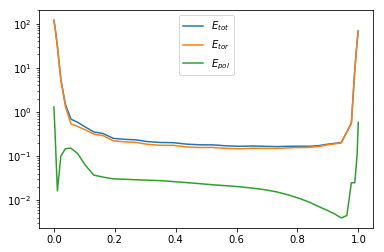

In [47]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.semilogy(r, Etot[0], label = r'$E_{tot}$')
plt.semilogy(r, Etot[1], label = r'$E_{tor}$')
plt.semilogy(r, Etot[2], label = r'$E_{pol}$')
plt.legend()

The total kinetic dissipation integrater over the entire volume is {{Disstot}}

For the benchmark with stateX.hdf5, Philippe reports $E_{tor} = E_{tot} =$ 0.49198018906783 

We obtain here $E_{tor} = E_{tot} =$ {{Etot[1]*2}}

The real value is {{u_2/2/volume}}

### Benchmarks

(48,)
(48,)
4.223551093598467e-14
1.1408044098618951e-14
2.7431185319402604e-15 5.7520668825094945e-15 3.5047065431292707e-15


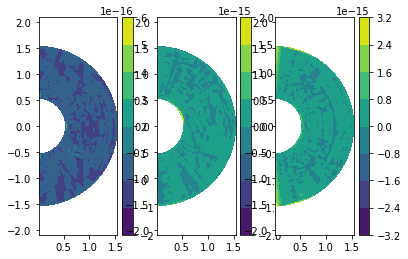

In [48]:
# Benchmark for meridional slice
print(spectralFieldMeridional['uR'][0].shape)
print(physicalFieldMeridional['uR'][0].shape)
print(np.linalg.norm(spectralFieldMeridional['x'] - physicalFieldMeridional['x'][1:-1, :]))
print(np.linalg.norm(spectralFieldMeridional['y'] - physicalFieldMeridional['y'][1:-1, :]))
%matplotlib inline
plt.figure(6)
plt.subplot(131)
f1 = plt.contourf(spectralFieldMeridional['x'], spectralFieldMeridional['y'], \
                  (spectralFieldMeridional['uR']-physicalFieldMeridional['uR'][1:-1, :]))
err_ur = np.linalg.norm(spectralFieldMeridional['uR']\
                        -physicalFieldMeridional['uR'][1:-1, :])/np.linalg.norm(spectralFieldMeridional['uR'])
plt.colorbar(f1)
plt.axis('equal')
plt.subplot(132)
f2 = plt.contourf(spectralFieldMeridional['x'], spectralFieldMeridional['y'], \
                  (spectralFieldMeridional['uTheta']-physicalFieldMeridional['uTheta'][1:-1, :]))
err_utheta = np.linalg.norm(spectralFieldMeridional['uTheta']\
                        -physicalFieldMeridional['uTheta'][1:-1, :])/np.linalg.norm(spectralFieldMeridional['uTheta'])
plt.colorbar(f2)
plt.axis('equal')
plt.subplot(133)
f3 = plt.contourf(spectralFieldMeridional['x'], spectralFieldMeridional['y'], \
                  (spectralFieldMeridional['uPhi']-physicalFieldMeridional['uPhi'][1:-1, :]))
err_uphi = np.linalg.norm(spectralFieldMeridional['uPhi']\
                        -physicalFieldMeridional['uPhi'][1:-1, :])/np.linalg.norm(spectralFieldMeridional['uPhi'])
plt.colorbar(f3)
plt.axis('equal')
print(err_ur, err_utheta, err_uphi)

The relative $L_2$-error for $u_r$ is {{err_ur}}

The relative $L_2$-error for $u_\theta$ is {{err_utheta}}

The relative $L_2$-error for $u_\phi$ is {{err_uphi}} 
\begin{equation}
   \mathbf{u} = rt
\end{equation}

(48,)
(48,)
1.638415678134867e-14
1.7341674426841696e-14
0.08149643434752474 0.3915614884506105 0.013204479230469472


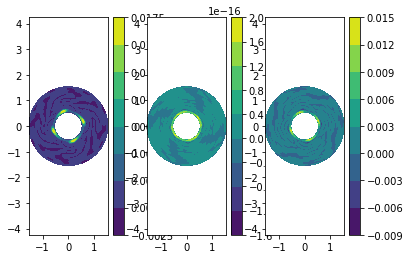

In [49]:
# Benchmark for equatorial slice
print(spectralFieldEquatorial['uR'][0].shape)
print(physicalFieldEquatorial['uR'][0].shape)
print(np.linalg.norm(spectralFieldEquatorial['x'] - physicalFieldEquatorial['x']))
print(np.linalg.norm(spectralFieldEquatorial['y'] - physicalFieldEquatorial['y']))
%matplotlib inline
plt.figure(6)
plt.subplot(131)
f1 = plt.contourf(spectralFieldEquatorial['x'], spectralFieldEquatorial['y'], \
                  (spectralFieldEquatorial['uR']-physicalFieldEquatorial['uR']))
err_ur = np.linalg.norm(spectralFieldEquatorial['uR']\
                        -physicalFieldEquatorial['uR'])/np.linalg.norm(spectralFieldEquatorial['uR'])
plt.colorbar(f1)
plt.axis('equal')
plt.subplot(132)
f2 = plt.contourf(spectralFieldEquatorial['x'], spectralFieldEquatorial['y'], \
                  (spectralFieldEquatorial['uTheta']-physicalFieldEquatorial['uTheta']))
err_utheta = np.linalg.norm(spectralFieldEquatorial['uTheta']\
                        -physicalFieldEquatorial['uTheta'])/np.linalg.norm(spectralFieldEquatorial['uTheta'])
plt.colorbar(f2)
plt.axis('equal')
plt.subplot(133)
f3 = plt.contourf(spectralFieldEquatorial['x'], spectralFieldEquatorial['y'], \
                  (spectralFieldEquatorial['uPhi']-physicalFieldEquatorial['uPhi']))
err_uphi = np.linalg.norm(spectralFieldEquatorial['uPhi']\
                        -physicalFieldEquatorial['uPhi'])/np.linalg.norm(spectralFieldEquatorial['uPhi'])
plt.colorbar(f3)
plt.axis('equal')
print(err_ur, err_utheta, err_uphi)

The relative $L_2$-error for $u_r$ is {{err_ur}}

The relative $L_2$-error for $u_\theta$ is {{err_utheta}}

The relative $L_2$-error for $u_\phi$ is {{err_uphi}}

(72,)
(74,)
4.666661824846867e-14
2.19925065082094e-14
0.011434983891382557 0.009784999330811096 0.002146473086938028


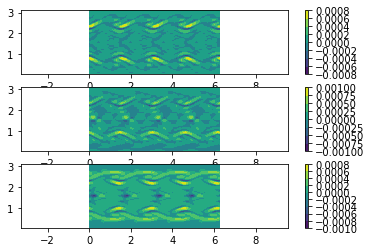

In [50]:
# Benchmark Isoradius slice
print(spectralFieldIsoradius['uR'][0].shape)
print(physicalFieldIsoradius['uR'][0].shape)
print(np.linalg.norm(spectralFieldIsoradius['theta'] - physicalFieldIsoradius['theta'][:,1:-1]))
print(np.linalg.norm(spectralFieldIsoradius['phi'] - physicalFieldIsoradius['phi'][:,1:-1]))
%matplotlib inline

plt.figure(6)

plt.subplot(311)
f1 = plt.contourf(spectralFieldIsoradius['phi'], spectralFieldIsoradius['theta'], \
                  (spectralFieldIsoradius['uR']-physicalFieldIsoradius['uR'][:,1:-1]))
err_ur = np.linalg.norm(spectralFieldIsoradius['uR']-\
          physicalFieldIsoradius['uR'][:,1:-1]) /np.linalg.norm(spectralFieldIsoradius['uR'])
plt.colorbar(f1)
plt.axis('equal')

plt.subplot(312)
f2 = plt.contourf(spectralFieldIsoradius['phi'], spectralFieldIsoradius['theta'], \
                  (spectralFieldIsoradius['uTheta']-physicalFieldIsoradius['uTheta'][:,1:-1]))
err_utheta = np.linalg.norm(spectralFieldIsoradius['uTheta']-\
          physicalFieldIsoradius['uTheta'][:,1:-1]) /np.linalg.norm(spectralFieldIsoradius['uTheta'])
plt.colorbar(f2)
plt.axis('equal')

plt.subplot(313)
f3 = plt.contourf(spectralFieldIsoradius['phi'], spectralFieldIsoradius['theta'], \
                  (spectralFieldIsoradius['uPhi']-physicalFieldIsoradius['uPhi'][:,1:-1]))
err_uphi = np.linalg.norm(spectralFieldIsoradius['uPhi']-\
          physicalFieldIsoradius['uPhi'][:,1:-1]) /np.linalg.norm(spectralFieldIsoradius['uPhi'])
plt.colorbar(f3)
plt.axis('equal')
print(err_ur, err_utheta, err_uphi)

The relative $L_2$-error for $u_r$ is {{err_ur}}

The relative $L_2$-error for $u_\theta$ is {{err_utheta}}

The relative $L_2$-error for $u_\phi$ is {{err_uphi}}

In [31]:
mySpectralData.parameters.time

3988.2573073415697